# Stochastic Response
Richard M. Murray, 6 Feb 2022

This notebook illustrates the implementation of random processes and stochastic response.  We focus on a system of the form
$$
  \dot X = A X + F V \qquad X \in {\mathbb R}^n
$$

where $V$ is a white noise process and the system is a first order linear system.

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import control as ct
from math import sqrt, exp

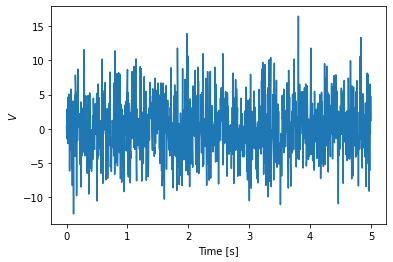

In [27]:
# First order system
a = 1
c = 1
sys = ct.tf(c, [1, a])

# Create the time vector that we want to use
Tf = 5
T = np.linspace(0, Tf, 1000)
dt = T[1] - T[0]

# Create the basis for a white noise signal
# Note: use sqrt(Q/dt) for desired covariance
Q = np.array([[0.1]])
# V = np.random.normal(0, sqrt(Q[0,0]/dt), T.shape)
V = ct.white_noise(T, Q)

plt.plot(T, V[0])
plt.xlabel('Time [s]')
plt.ylabel('$V$');

Note that the magnitude of the signal seems to be much larger than $Q$.  This is because we have a Guassian process $\implies$ the signal consists of a sequence of "impulse-like" functions that have magnitude that increases with the time step $dt$ as $1/\sqrt{dt}$ (this gives covariance $\mathbb{E}(V(t_1) V^T(t_2)) = Q \delta(t_2 - t_1)$.

In [28]:
# Calculate the sample properties and make sure they match
print("mean(V) [0.0] = ", np.mean(V))
print("cov(V) * dt [%0.3g] = " % Q, np.round(np.cov(V), decimals=3) * dt)

mean(V) [0.0] =  0.14775487875720242
cov(V) * dt [0.1] =  0.09761761761761763


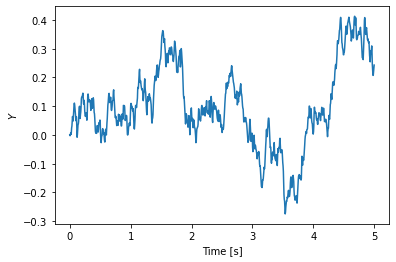

In [29]:
# Response of the first order system
# Scale white noise by sqrt(dt) to account for impulse
T, Y = ct.forced_response(sys, T, V)
plt.plot(T, Y)
plt.xlabel('Time [s]')
plt.ylabel('$Y$');

This is a first order system, and so we can use the calculation from the course
notes to compute the analytical correlation function and compare this to the 
sampled data:

In [30]:
# Compare static properties to what we expect analytically
def r(tau):
    return c**2 * Q / (2 * a) * exp(-a * abs(tau))
    
print("* mean(Y) [%0.3g] = %0.3g" % (0, np.mean(Y)))
print("* cov(Y) [%0.3g] = %0.3g" % (r(0), np.cov(Y)))

* mean(Y) [0] = 0.0985
* cov(Y) [0.05] = 0.0207


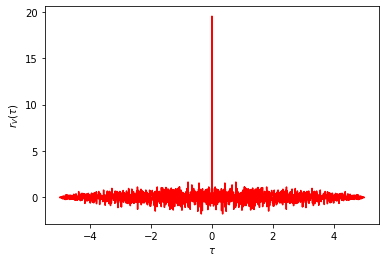

In [31]:
# Correlation function for the input
# Scale by dt to take time step into account
# r_V = sp.signal.correlate(V, V) * dt / Tf
# tau = sp.signal.correlation_lags(len(V), len(V)) * dt
tau, r_V = ct.correlation(T, V)

plt.plot(tau, r_V, 'r-')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r_V(\tau)$');

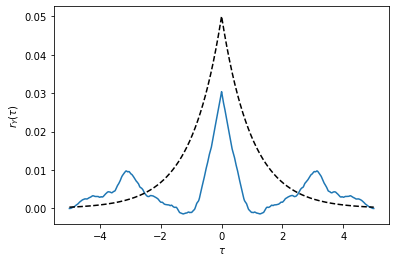

In [32]:
# Correlation function for the output
# r_Y = sp.signal.correlate(Y, Y) * dt / Tf
# tau = sp.signal.correlation_lags(len(Y), len(Y)) * dt
tau, r_Y = ct.correlation(T, Y)
plt.plot(tau, r_Y)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r_Y(\tau)$')

# Compare to the analytical answer
plt.plot(tau, [r(t)[0, 0] for t in tau], 'k--');

The analytical curve may or may not line up that well with the correlation function based on the sample.  Try running the code again from the top to see how things change based on the specific random sequence chosen at the start.

Note: the _right_ way to compute the correlation function would be to run a lot of different samples of white noise filtered through the system dynamics and compute $R(t_1, t_2)$ across those samples.